In [339]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Perceptron camada única e ADALINE

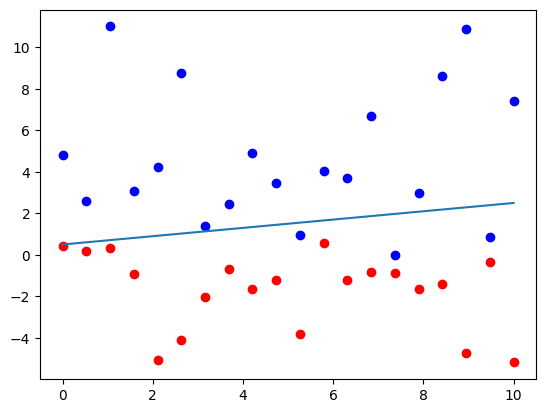

In [340]:
# Parametros alvo
a, b = 0.2, 0.5

samples = 20

x = np.linspace(0,10,samples).reshape((samples,1))
y = a*x + b

sigma = 3
mu = 3

zeros = np.zeros((samples,1))

np.random.seed(5)
class_0 = y+ np.random.normal(loc=mu,scale=sigma,size=samples).reshape((samples,1))
class_0 = np.concatenate((zeros+1,x,class_0,zeros+1),axis=1)
class_1= y- np.random.normal(loc=mu,scale=sigma,size=samples).reshape((samples,1))
class_1 = np.concatenate((zeros+1,x,class_1,zeros-1),axis=1)

plt.plot(x,y)
plt.scatter(class_0[:,1],class_0[:,2],color='blue')
plt.scatter(class_1[:,1],class_1[:,2],color='red')

In [341]:
np.random.shuffle(class_0)
np.random.shuffle(class_1)

In [342]:
xy_data = np.stack((class_0,class_1),axis=2)
xy_data.shape

(20, 4, 2)

In [343]:
train_split  = int(0.8*len(xy_data))
xy_train  = xy_data[:train_split]
xy_test = xy_data[train_split:]

In [344]:
np.random.rand(3)

array([0.63887768, 0.49341505, 0.58349974])

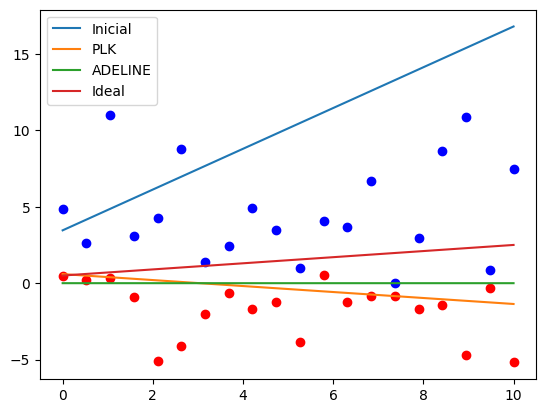

In [345]:
w_p = np.random.normal(size=3).reshape((3,1))
w_ad = w_p.copy()
w_ideal = np.array([-b,-a,1]).reshape((3,1))
#w = w_ideal

w2  = w_p[2][0]
b_p,a_p,*_ = (-w_p.reshape(3))/w2
plt.plot(x,(a_p*x) + b_p,label='Inicial')

# learning rate
lr = 0.1
epochs = 1000
delta_w = 0
for epoch in range(epochs):
    for k in range(train_split):
        for cls in range(2):
            xk  = xy_train[k,:3,cls].reshape(-1,1)
            dk = xy_train[0,3,cls]

            u_p = np.sum(xk * w_p)
            u_ad = np.sum(xk * w_ad)

            yk_p = 1 if u_p > 0 else -1
            yk_ad = 1 if u_ad > 0 else -1

            diff_p = dk - yk_p
            diff_ad = dk - yk_ad

            w_p = w_p + lr*(diff_p)*xk
            delta_w += lr*diff_ad*xk
    w_ad += delta_w

w2_p  = w_p[2][0]
b_p,a_p,*_ = (-w_p.reshape(3))/w2_p

w2_ad  = w_ad[2][0]
b_ad,a_ad,*_ = (-w_p.reshape(3))/w2_ad



plt.plot(x,(a_p*x) + b_p,label=f'PLK')
plt.plot(x,(a_ad*x) + b_ad,label=f'ADALINE')


plt.plot(x,y,label='Ideal')
plt.scatter(class_0[:,1],class_0[:,2],color='blue')
plt.scatter(class_1[:,1],class_1[:,2],color='red')
plt.legend()

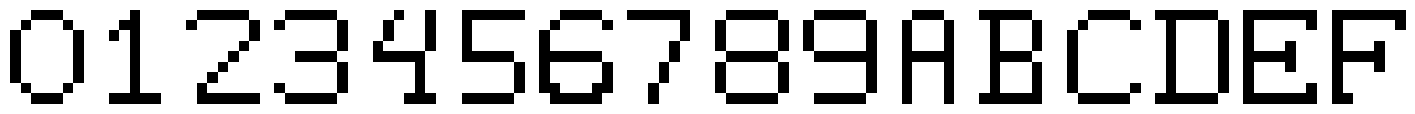

In [346]:
from geraChar import *
P = geraChar().reshape((16,63,1))
num_samples = len(P)

showChar(P)

D_k = []
X_k = []

for k in range(num_samples):
    d_k = np.zeros((16,1)) -1
    d_k[k] = 1
    D_k.append(d_k)
    x_k = np.concatenate(
    [
        np.ones(1).reshape((1,1)),
        P[k]
    ],
    axis=0
    )
    X_k.append(x_k)


layer_sizes = [
    (63,50),
    (50,40),
    (40,20),
    (20,16),
]

num_layers = len(layer_sizes)

W_l = []
Y_l = []
I_l = []

# Qnt entradas => cols
# Qnt saidas => rows
for cols, rows in layer_sizes:
    W_l.append(
        np.random.rand(rows*(cols+1)).reshape((rows,cols+1))/1000
    )
    Y_l.append(
        np.ones(rows+1).reshape(rows+1,1)
    )
    I_l.append(
        np.zeros(rows).reshape(rows,1)
    )


D_k = []
X_k = []

for k in range(num_samples):
    d_k = np.zeros((16,1)) -1
    d_k[k] = 1
    D_k.append(d_k)
    x_k = np.concatenate(
    [
        np.ones(1).reshape((1,1)),
        P[k]
    ],
    axis=0
    )
    X_k.append(x_k)


layer_sizes = [
    (63,50),
    (50,16),
]


In [351]:
num_layers = len(layer_sizes)

W_l = []
Y_l = []
I_l = []

np.random.seed(42)
# Qnt entradas => cols
# Qnt saidas => rows
for cols, rows in layer_sizes:
    weights = np.random.randn(rows, cols)
    bias  = np.random.randn(rows, 1)
    W_l.append(
        #np.random.rand(rows*(cols+1)).reshape((rows,cols+1))
        np.concatenate([bias,weights],axis=1)
    )
    Y_l.append(
        np.ones(rows+1).reshape(rows+1,1)
    )
    I_l.append(
        np.zeros(rows).reshape(rows,1)
    )



In [352]:
lr = 0.2
erro = 0
cont = 1
for epoch in range(1):
    for k in range(num_samples):
        x_k = X_k[k]
        d_k = D_k[k]
        for l in range(num_layers):
            if l == 0:
                i_l = W_l[l] @ x_k
            else:
                i_l = W_l[l] @ Y_l[l-1]
            y_l = np.tanh(i_l)
            print("=*"*20)
            I_l[l][:] = i_l
            Y_l[l][1:] = y_l
            print(W_l[l][0][:2])
        print(y_l)
        erro += np.sum((d_k - y_l)**2)/100
        cont -= 1
        if cont == 0:
            #print(erro)
            cont = 100
            erro = 0
        for l in range(num_layers-1,-1,-1):
            if l == (num_layers -1):
                print(f"grad = {2*(d_k - Y_l[l][1:])/ np.size(d_k)}")
                delta = 2*(d_k - Y_l[l][1:])*tanh_prime(i_l)/ np.size(d_k)
                delta_w = delta @ Y_l[l-1].T
            elif l > 0:
                delta = (W_l[l+1][:,1:].T @ delta) * tanh_prime(I_l[l])
                delta_w = delta @ Y_l[l-1].T
            else:
                delta = (W_l[l+1][:,1:].T @ delta) * tanh_prime(I_l[l])
                delta_w = delta @ x_k.T

            W_l[l] += lr * delta_w
    

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
[0.8419837  0.49671415]
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
[-0.8634936   0.18517554]
[[ 0.99999179]
 [ 1.        ]
 [ 0.99999995]
 [-0.47364159]
 [ 0.99881448]
 [-0.99951443]
 [ 0.98958203]
 [-0.9999137 ]
 [ 0.92366973]
 [ 0.99170986]
 [ 0.99939808]
 [-0.99257513]
 [-0.99999563]
 [ 0.93143734]
 [-0.99999901]
 [-1.        ]]
grad = [[ 1.02609538e-06]
 [-2.50000000e-01]
 [-2.49999994e-01]
 [-6.57948014e-02]
 [-2.49851810e-01]
 [-6.06964148e-05]
 [-2.48697754e-01]
 [-1.07878960e-05]
 [-2.40458716e-01]
 [-2.48963733e-01]
 [-2.49924760e-01]
 [-9.28108810e-04]
 [-5.46534023e-07]
 [-2.41429668e-01]
 [-1.23169390e-07]
 [-2.17895146e-13]]
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
[0.84200028 0.49671415]
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
[-0.8634936   0.18517554]
[[-0.98774019]
 [ 1.        ]
 [-0.99997815]
 [-0.90364939]
 [ 0.99999892]
 [-0.99997584]
 [ 0.99996855]
 [ 0.9992147 ]
 [-0.99945198]
 [ 0.9999999 ]
 [ 1.        ]
 [ 0.96105123]
 [-